# Resps data exploration

Using C# interactive in a notebook

## Preamble

In [1]:
// Install some packages
#r "nuget: Microsoft.Data.Analysis, 0.21.1"
#r "nuget: Microsoft.ML, 3.0.1"
#r "nuget:ScottPlot, 5.0.34"

Installed Packages Microsoft.Data.Analysis, 0.21.1 Microsoft.ML, 3.0.1 ScottPlot, 5.0.34

Loading extensions from `/Users/wilhelm/hiber-admin/.nuget/packages/microsoft.data.analysis/0.21.1/interactive-extensions/dotnet/Microsoft.Data.Analysis.Interactive.dll`

Loading extensions from `/Users/wilhelm/hiber-admin/.nuget/packages/skiasharp/2.88.8/interactive-extensions/dotnet/SkiaSharp.DotNet.Interactive.dll`

In [2]:
// Register ScottPlot formatting
using Microsoft.DotNet.Interactive.Formatting;
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetImageHtml(600,400)), HtmlFormatter.MimeType);

In [3]:
using Microsoft.Data.Analysis;
using Microsoft.ML;
using System.Linq;

// Load the data
var df = DataFrame.LoadCsv("./resps.csv", separator: ';', dataTypes: new [] { typeof(string), typeof(string), typeof(double), typeof(int), typeof(int) });

## Average number of exposures

Average number of exposures: 5.96



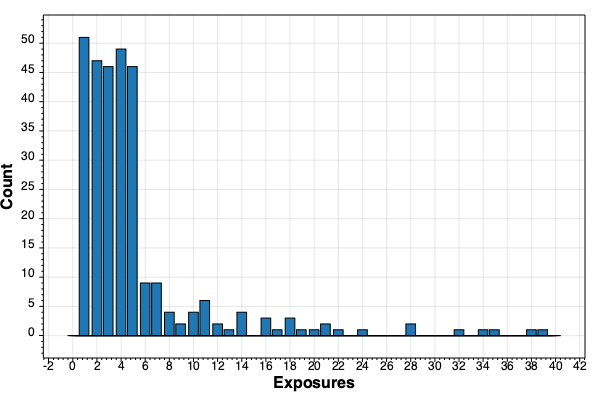

In [5]:
var avgExposures = df["Exposures"].Mean();
System.Console.WriteLine($"Average number of exposures: {avgExposures.ToString("F2")}");

ScottPlot.Plot plt = new();
ScottPlot.Statistics.Histogram hist = new(min: 0, max: 40, binCount: 300);
hist.AddRange(df["Exposures"].Cast<double>());
plt.Add.Bars(hist.Bins, hist.Counts);
plt.XLabel("Exposures");
plt.YLabel("Count");

plt

## Min/Max time in view

Max time in view: 1614
Min time in view: 2



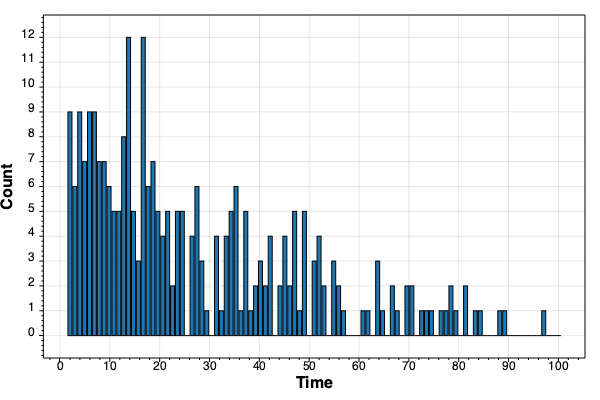

In [6]:
int maxTimeInView = df["TimeInView"].Cast<int>().Max();
int minTimeInView = df["TimeInView"].Cast<int>().Min();

System.Console.WriteLine($"Max time in view: {maxTimeInView}");
System.Console.WriteLine($"Min time in view: {minTimeInView}");

plt = new();
ScottPlot.Statistics.Histogram hist = new(min: minTimeInView, max: 100, binCount: 100);
hist.AddRange(df["TimeInView"].Cast<int>().Select(v => (double)v));
plt.Add.Bars(hist.Bins, hist.Counts);
plt.YLabel("Count");
plt.XLabel("Time");

// df["TimeInView"].Sort().ValueCounts()
plt


## During which time of day do we get most responses?

Most responses during hour: 8 with 110 responses



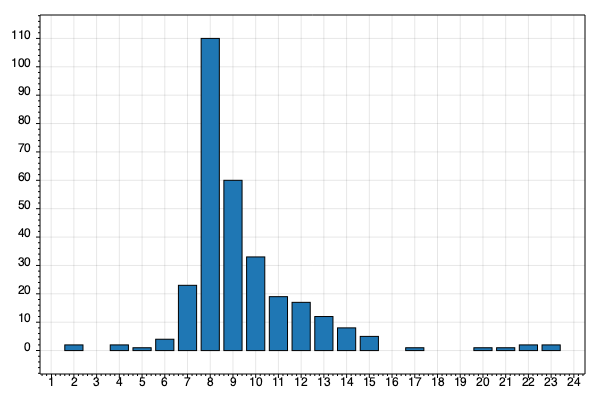

In [7]:
var hourCounts = df["TimeStamp"]
    .Cast<string>()
    .Select(v => DateTime.ParseExact(v.ToString(), "yyyyMMddHH", null))
    .GroupBy(v => v.Hour)
    .Select(g => new { Hour = g.Key, Count = g.Count() })
    .OrderByDescending(v => v.Count);

System.Console.WriteLine($"Most responses during hour: {hourCounts.First().Hour} with {hourCounts.First().Count} responses");

plt = new();
plt.Add.Bars(hourCounts.Select(v => (double)v.Hour), hourCounts.Select(v => (double)v.Count));

plt